In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

alpha = 0.05

### Data Import & EDA

In [4]:
data = pd.read_csv('../Data/data.csv')
data.head(10)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95
5,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,95-100% (highest scores),...,NaN,43.5,74.05,9.3,83.22,23.7,76.35,83.37,8.65,95.46
6,6019001000,4255,Fresno,93706,Fresno,-119.804314,36.697751,80.55,99.92,95-100% (highest scores),...,88.70,79.5,99.41,15.4,97.14,33.3,94.83,95.84,9.94,99.99
7,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.29,99.91,95-100% (highest scores),...,60.62,56.8,88.92,12.6,93.49,29.6,89.84,85.44,8.86,96.90
8,6019001202,4561,Fresno,93725,Unincorporated Fresno County area,-119.741028,36.702685,79.17,99.90,95-100% (highest scores),...,89.62,72.2,98.12,16.3,97.90,30.8,91.76,87.24,9.05,98.05
9,6077000100,3688,San Joaquin,95202,Stockton,-121.285363,37.953996,77.87,99.89,95-100% (highest scores),...,91.39,78.8,99.31,14.6,96.46,33.1,94.64,95.83,9.94,99.97


In [5]:
clean = data[['Total Population', 'California County', 'ZIP', 'Poverty', 'Lead', 'Pollution Burden', 'Asthma', 'Linguistic Isolation', 'Education']].sort_values('Poverty', ascending=False)
clean['Linguistic_Isolation'] = clean['Linguistic Isolation']
clean['Pollution_Burden'] = clean['Pollution Burden']

clean.drop(columns=['Pollution Burden', 'Linguistic Isolation'])

columns = ['Poverty', 'Lead', 'Pollution_Burden', 'Asthma', 'Linguistic_Isolation', 'Education']
std_clean = clean
std_clean = (clean[columns] - clean[columns].mean()) / clean[columns].std()

In [6]:
sd = clean[clean['California County'] == 'San Diego']
la = clean[clean['California County'] == 'Los Angeles']

sd_la = pd.concat([sd, la]).dropna()
sd_la['Is_La'] = sd_la['California County'] == 'Los Angeles'

sd_la.shape

(2845, 12)

In [7]:
def present(feature_x, feature_y):
    plt.scatter(x=sd_la[feature_x],y=sd_la[feature_y])

In [8]:
'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides', 
'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats', 
'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Pollution Burden',
'Asthma', 'Asthma Pctl', 'Low Birth Weight',  


'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden', 
'Pop. Char. ', 'Cardiovascular Disease', 'Education'

('Pop. Char. ', 'Cardiovascular Disease', 'Education')

<Axes: >

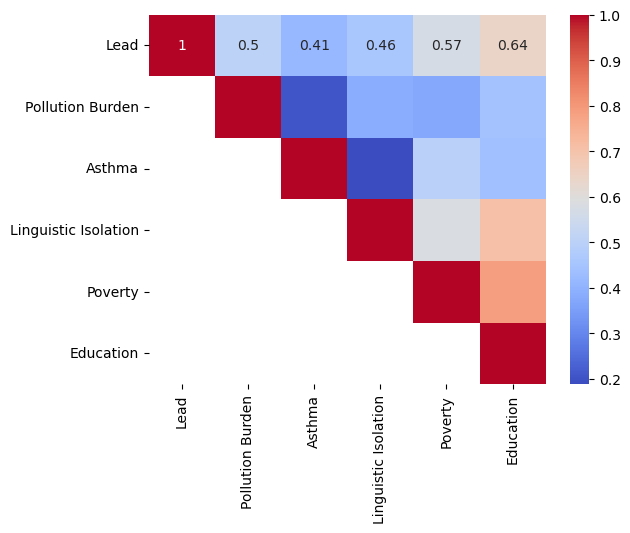

In [9]:
drop_data = data[['Lead', 'Pollution Burden', 'Asthma', 'Linguistic Isolation', 'Poverty', 'Education']]
variables = drop_data.columns
corr_table = drop_data[variables].corr() 
sns.heatmap(corr_table, annot=True, cmap='coolwarm', mask=np.tril(corr_table, k=-1))

# Regression Assumptions

### Independence of residuals

In [10]:
model = smf.ols('Education ~ Poverty + Lead + Asthma + Linguistic_Isolation + Pollution_Burden + C(Is_La)', sd_la).fit()

In [11]:
def standardize(X):
    return (X - X.mean()) / X.std()

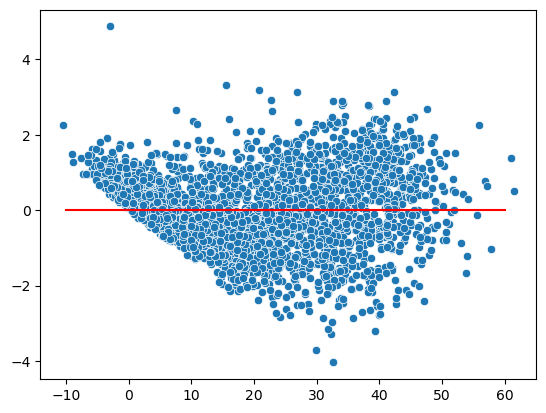

In [12]:
sns.scatterplot(x=model.fittedvalues, y=standardize(model.resid))
plt.plot(np.linspace(-10, 60, 100), np.zeros(100), 'r')

### Normality of Residuals

(array([0.00394677, 0.        , 0.        , 0.00394677, 0.        ,
        0.        , 0.        , 0.        , 0.00394677, 0.00789354,
        0.        , 0.00394677, 0.        , 0.01184031, 0.01973385,
        0.01184031, 0.01578708, 0.02368062, 0.01973385, 0.01973385,
        0.03946771, 0.04341448, 0.05920156, 0.04736125, 0.07104187,
        0.05920156, 0.09077573, 0.0947225 , 0.1618176 , 0.1341902 ,
        0.09077573, 0.20917885, 0.15787083, 0.21707239, 0.2289127 ,
        0.29206103, 0.26048687, 0.37494322, 0.35126259, 0.37099645,
        0.45387863, 0.44993186, 0.4183577 , 0.41441092, 0.40257061,
        0.39467707, 0.36310291, 0.39862384, 0.33942228, 0.35915613,
        0.33942228, 0.29206103, 0.29206103, 0.26443364, 0.30784812,
        0.28416749, 0.24469978, 0.25259333, 0.22496593, 0.14603052,
        0.17365791, 0.1341902 , 0.15392406, 0.10261604, 0.0947225 ,
        0.07893541, 0.05920156, 0.04341448, 0.04736125, 0.03157417,
        0.03157417, 0.03946771, 0.02368062, 0.00

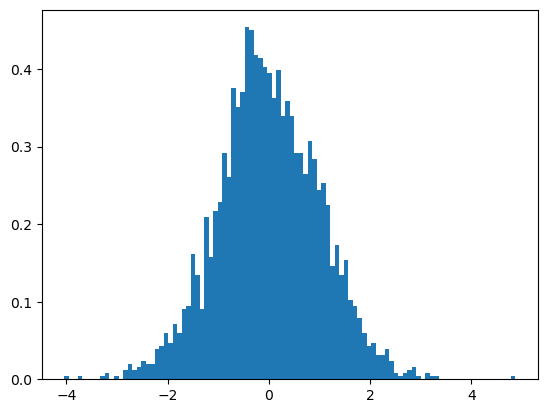

In [13]:
plt.hist(standardize(model.resid), bins=100, density=True)

In [14]:
residuals_pvalue = stats.shapiro(standardize(model.resid)).pvalue
if residuals_pvalue < alpha:
    print("REJECT NULL")
else:
    print("FAIL TO REJECT NULL")

residuals_pvalue 

NameError: name 'alpha' is not defined

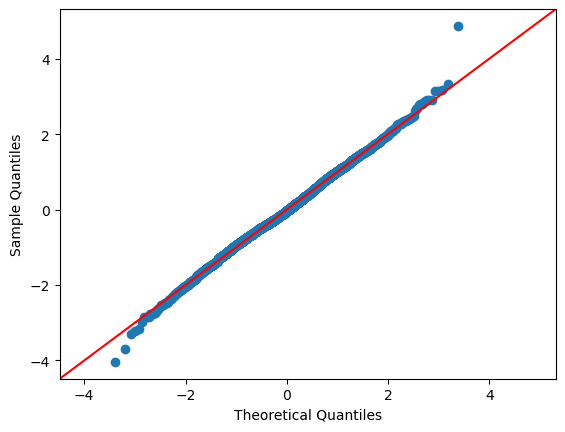

In [ ]:
qq = sm.qqplot(standardize(model.resid), stats.norm, line='45')

### Check for Independence

<BarContainer object of 21 artists>

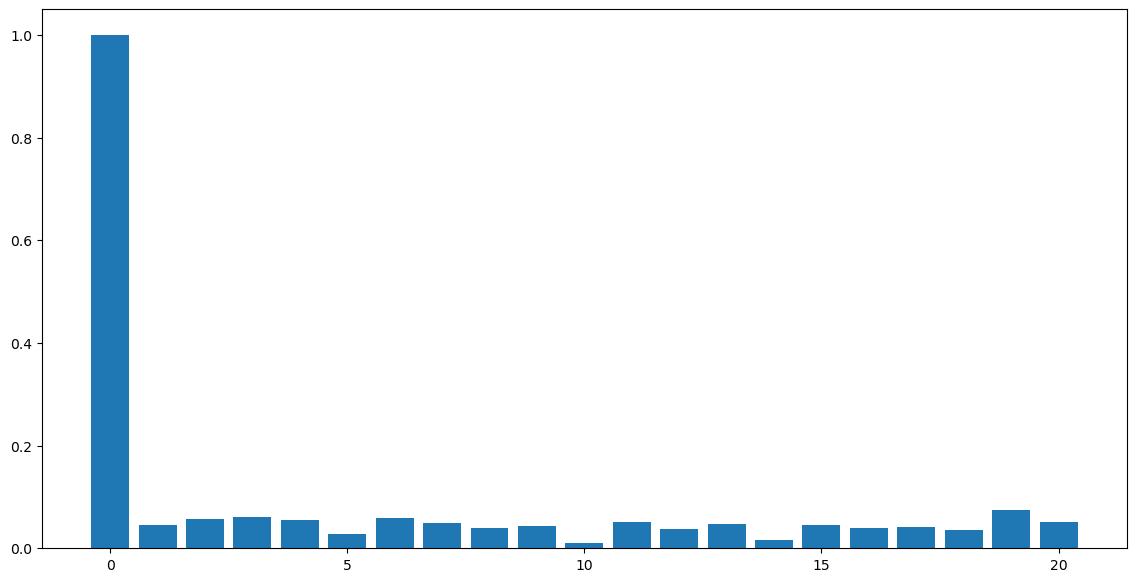

In [ ]:
from statsmodels.tsa.stattools import acf

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

lags = 20
ax.bar(range(lags+1), acf(model.resid, nlags=lags))

### Heteroscedasticity


<Axes: >

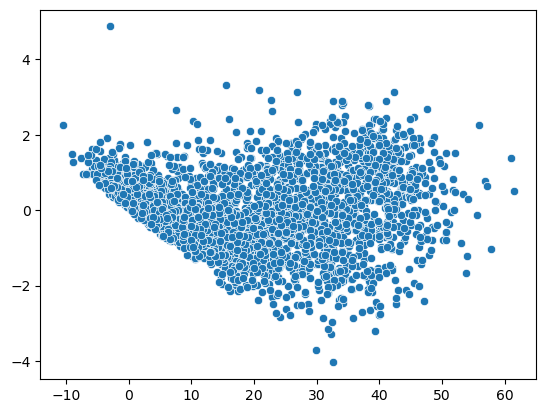

In [ ]:
columns = ['Poverty', "Lead", "Asthma", "Linguistic_Isolation", "Pollution_Burden", 'Is_La']
sns.scatterplot(x=model.predict(sd_la[columns]), y=standardize(model.resid))

### Completeness

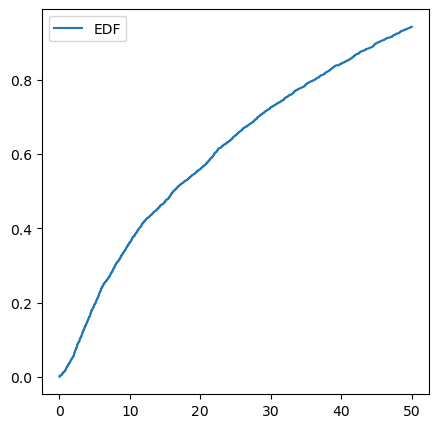

In [ ]:
xrange = np.linspace(0, 50, 1000)
sd_la_ecdf= np.array([sum(sd_la['Education'] < x) for x in xrange]) / len(sd_la)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(xrange, sd_la_ecdf, label='EDF')
ax.legend()

(array([0.01976852, 0.03134033, 0.03809055, 0.051591  , 0.04532294,
        0.03953703, 0.04725157, 0.04484078, 0.03326897, 0.02651874,
        0.04050135, 0.0270009 , 0.02796522, 0.03375112, 0.0270009 ,
        0.02555442, 0.02507226, 0.01687556, 0.01687556, 0.0188042 ,
        0.01976852, 0.02362579, 0.02073283, 0.01494693, 0.01542909,
        0.01542909, 0.01591124, 0.0163934 , 0.01832204, 0.02025067,
        0.02507226, 0.01494693, 0.01301829, 0.0163934 , 0.0188042 ,
        0.01542909, 0.01157181, 0.01735772, 0.01542909, 0.01446477,
        0.01108966, 0.01446477, 0.0106075 , 0.01494693, 0.01157181,
        0.01542909, 0.00964318, 0.01205397, 0.01301829, 0.00964318,
        0.01253613, 0.01205397, 0.01205397, 0.01253613, 0.00675022,
        0.0106075 , 0.01157181, 0.01301829, 0.01157181, 0.0081967 ,
        0.00723238, 0.01446477, 0.00916102, 0.00867886, 0.00916102,
        0.00867886, 0.01012534, 0.0081967 , 0.00916102, 0.00867886,
        0.00723238, 0.00385727, 0.00867886, 0.00

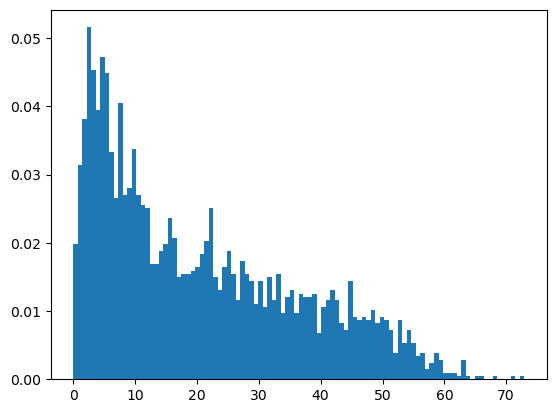

In [ ]:
plt.hist(sd_la['Education'], bins=100, density=True)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Education   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1679.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        10:10:09   Log-Likelihood:                -9773.6
No. Observations:                2845   AIC:                         1.956e+04
Df Residuals:                    2838   BIC:                         1.960e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -11.7013      0.614    -19.044      0.000     -12.906     -10.497
C(Is_La)[T.True]        -2.8268      0.425     -6.658      0.000      -3.659      -1.994
Poverty                  0.3574      0.014     26.080      0.000       0.331       0.384
Lead                     0.2323      0.009     24.968      0.000       0.214       0.251
Asthma                   0.0643      0.007      9.450      0.000       0.051       0.078
Linguistic_Isolation     0.3736      0.020     18.843      0.000       0.335       0.413
Pollution_Burden         0.0215      0.015      1.395      0.163      -0.009       0.052
==============================================================================
Omnibus:                        8.504   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.464
Skew:                           0.020   Prob(JB):                      0.00534
Kurtosis:                       3.295   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2 = smf.ols('Education ~ Poverty + Linguistic_Isolation + Asthma + Linguistic_Isolation:Asthma + Poverty:Linguistic_Isolation + Poverty:Asthma + C(Is_La)', sd_la).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Education   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1158.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        10:10:09   Log-Likelihood:                -10009.
No. Observations:                2845   AIC:                         2.003e+04
Df Residuals:                    2837   BIC:                         2.008e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -6.5261      0.699     -9.330      0.000      -7.898      -5.155
C(Is_La)[T.True]                 1.6402      0.410      3.997      0.000       0.836       2.445
Poverty                          0.5947      0.026     22.736      0.000       0.543       0.646
Linguistic_Isolation            -0.1703      0.055     -3.094      0.002      -0.278      -0.062
Asthma                           0.1044      0.015      7.144      0.000       0.076       0.133
Linguistic_Isolation:Asthma      0.0098      0.001     12.080      0.000       0.008       0.011
Poverty:Linguistic_Isolation     0.0012      0.001      1.299      0.194      -0.001       0.003
Poverty:Asthma                  -0.0025      0.000     -6.830      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       78.241   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.858
Skew:                          -0.049   Prob(JB):                     9.77e-42
Kurtosis:                       4.258   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([ 43., 175., 373., 501., 687., 657., 579., 629., 578., 511., 500.,
        471., 371., 275., 280., 239., 186., 147., 123., 104., 114.,  61.,
         54.,  25.,  46.,  58.,  40.,  46.,  37.,  17.,  15.,  19.,  10.,
          3.,   9.,   4.,   2.,   0.,   5.,   4.,  11.,   5.,   1.,   1.,
          1.,   0.,   3.,   0.,   2.,   2.]),
 array([-1.56025805e+00, -1.40389752e+00, -1.24753698e+00, -1.09117645e+00,
        -9.34815909e-01, -7.78455373e-01, -6.22094837e-01, -4.65734300e-01,
        -3.09373764e-01, -1.53013228e-01,  3.34730847e-03,  1.59707845e-01,
         3.16068381e-01,  4.72428917e-01,  6.28789454e-01,  7.85149990e-01,
         9.41510526e-01,  1.09787106e+00,  1.25423160e+00,  1.41059214e+00,
         1.56695267e+00,  1.72331321e+00,  1.87967374e+00,  2.03603428e+00,
         2.19239482e+00,  2.34875535e+00,  2.50511589e+00,  2.66147643e+00,
         2.81783696e+00,  2.97419750e+00,  3.13055803e+00,  3.28691857e+00,
         3.44327911e+00,  3.59963964e+00,  3.75600

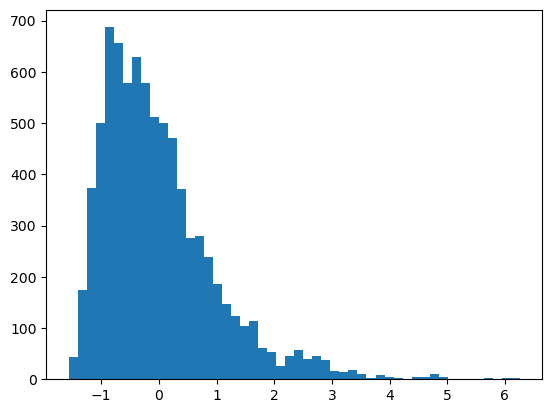

In [ ]:
plt.hist(std_clean['Asthma'], bins=50)

> Removed Asthma

In [ ]:
model3 = smf.ols('Education ~ Poverty + Lead + Linguistic_Isolation + C(Is_La)', sd_la).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Education   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     2421.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        10:10:09   Log-Likelihood:                -9818.0
No. Observations:                2845   AIC:                         1.965e+04
Df Residuals:                    2840   BIC:                         1.968e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -10.7210      0.425    -25.245      0.000     -11.554      -9.888
C(Is_La)[T.True]        -1.9891      0.397     -5.012      0.000      -2.767      -1.211
Poverty                  0.4162      0.012     33.541      0.000       0.392       0.441
Lead                     0.2562      0.009     29.303      0.000       0.239       0.273
Linguistic_Isolation     0.3186      0.019     16.727      0.000       0.281       0.356
==============================================================================
Omnibus:                       13.313   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.694
Skew:                          -0.029   Prob(JB):                     0.000144
Kurtosis:                       3.382   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
anova_table = sm.stats.anova_lm(model3, model)
print(anova_table)

   df_resid            ssr  df_diff      ss_diff          F        Pr(>F)
0    2840.0  165606.863713      0.0          NaN        NaN           NaN
1    2838.0  160517.595893      2.0  5089.267821  44.989903  5.814089e-20
